# Execute the code below

In [1]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [2]:
# Your code here :
df2018 = pd.merge(df_main, df_opinion, how='outer', left_on='DATE', right_on='date')
df2018.drop(columns=["date"], inplace=True)
df2018.shape

(365, 20)

# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [3]:
df_clean = df2018[df2018["SUNHOUR"].notna()]
df_clean.shape

(341, 20)

In [4]:
df_nan = df2018[df2018["SUNHOUR"].isna()]
df_nan.shape

(24, 20)

## Now, train your model
For this part, let's work on df_clean. 
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!). 

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [5]:
# Your code here :
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_clean[["MIN_TEMPERATURE_C", 'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
                'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 
                'WINDTEMP_MAX_C']]
y = df_clean['SUNHOUR']

# We set the size of the train set to 75%. And the rest is for the test set.
# We set the split NOT in random.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)


# Here we train the model only on the train dataset.
newmodel = LinearRegression().fit(X_train, y_train)

# And now we compare both scores :
print("\nScore for the Train dataset :", newmodel.score(X_train, y_train))
print("Score for the Test dataset :", newmodel.score(X_test, y_test))


Score for the Train dataset : 0.7292026074482832
Score for the Test dataset : 0.7009508266463599


Results between the train dataset and the test dataset are consistent, there is no overfitting or underfitting.

## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [6]:
df_nan['SUNHOUR'] = newmodel.predict(df_nan[["MIN_TEMPERATURE_C", 'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
                'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 
                'WINDTEMP_MAX_C']])
df_nan.shape

C:\Users\Berenger\AppData\Local\Temp/ipykernel_7000/45825788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['SUNHOUR'] = newmodel.predict(df_nan[["MIN_TEMPERATURE_C", 'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',


(24, 20)

## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values. 

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

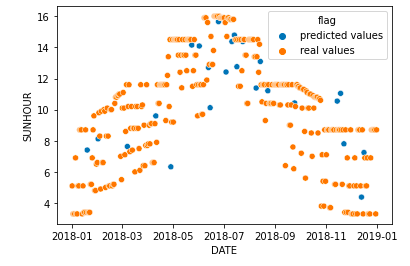

In [7]:
df_nan["flag"] = "predicted values"
df_clean["flag"] = "real values"

frames = [df_clean, df_nan]
df2018complete = pd.concat(frames)
df2018complete.shape

C:\Users\Berenger\AppData\Local\Temp/ipykernel_7000/2298633413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["flag"] = "predicted values"
C:\Users\Berenger\AppData\Local\Temp/ipykernel_7000/2298633413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["flag"] = "real values"


(365, 21)

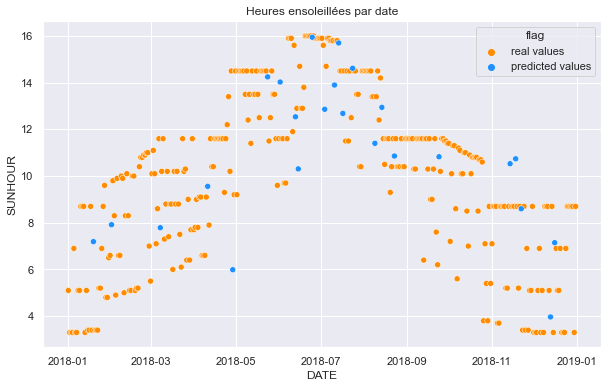

In [8]:
df2018complete['DATE'] = pd.to_datetime(df2018complete['DATE'])

sns.set_theme()
plt.figure(figsize=(10,6))

sns.scatterplot(data = df2018complete, x='DATE', y='SUNHOUR', hue='flag', palette=['darkorange', 'dodgerblue'])
plt.title('Heures ensoleillées par date')
plt.show()

In [9]:
#testing purpose
fig = px.scatter(df2018complete, x="DATE", y="SUNHOUR", color = 'flag')
fig.update_layout(height = 600, width = 800, title = "Heures ensoleillées par date", title_x=0.4)

fig.show()